In [1]:
from io import StringIO

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import NaN
from pylab import rcParams

rcParams["figure.figsize"] = 16, 4

## Log file

**For a fair comparison between groups, must follow the output format below**
<br>$\color{red}{\text{{seq},{timestamp\_tx},{timestamp\_rx},{payload in hex}}}$
<br> seq (decimal); timestamps (ticks with rtimer), payload (hex).
***
<br>*Example log file output for one packet with seq number "0x00", "0x01", "0x02"
<br>transmitter timestamp xxxx, reciever timestamp xxxx and random payload length 20)*
<br>00,xxxx,xxxx,2f c2 39 44 d3 16 7d b8 b7 aa 01 6c db 7e c5 60 3f 92 c9 94
<br>01,xxxx,xxxx,3c 6b ce d5 30 cf e2 d9 64 73 36 1d d8 57 ca a1 8c 7b 9e 65
<br>02,xxxx,xxxx,49 14 63 66 8d 88 47 fa 11 3c 6b ce d5 30 cf e2 d9 64 73 36
<br>$\color{red}{\text{delimiter for four variables is "," and delimiter for the payload each byte is the space " ".}}$

In [2]:
def readfile(filename):
    types = {
        "seq": int,
        "time_tx": float,
        "time_rx": float,
        "payload": str,
        "rssi": int,
    }
    df = pd.read_csv(
        StringIO(" ".join(l for l in open(filename))),
        skiprows=0,
        header=None,
        dtype=types,
        delim_whitespace=False,
        delimiter="|",
    )
    df.columns = ["seq", "time_tx", "time_rx", "payload", "rssi"]
    df.dropna(inplace=True)
    # print(df.describe())
    return df

In [3]:
# define the file name
filename = "log"
# import file to jupyter notebook
df = readfile("./" + filename + ".csv")

# check the imported data first 10 lines
df.head(10)

,seq,time_tx,time_rx,payload,rssi
0,0,66405,1781766,2f c2 39 44 d3 16 7d b8 b7 aa 01 6c db 7e c5 6...,-31
1,1,128906,1844756,3c 6b ce d5 30 cf e2 d9 64 73 36 1d d8 57 ca a...,-29
2,2,191408,1906287,49 14 63 66 8d 88 47 fa 11 3c 6b ce d5 30 cf e...,-30
3,3,253910,1971224,56 bd f8 f7 ea 41 ac 1b be 05 a0 7f d2 09 d4 2...,-29
4,4,316412,2032750,63 66 8d 88 47 fa 11 3c 6b ce d5 30 cf e2 d9 6...,-29
5,5,378913,2094763,70 0f 22 19 a4 b3 76 5d 18 97 0a e1 cc bb de a...,-29
6,6,441415,2158241,7d b8 b7 aa 01 6c db 7e c5 60 3f 92 c9 94 e3 e...,-29
7,7,503917,2219278,8a 61 4c 3b 5e 25 40 9f 72 29 74 43 c6 6d e8 2...,-29
8,8,566419,2282756,97 0a e1 cc bb de a5 c0 1f f2 a9 f4 c3 46 ed 6...,-29
9,9,628920,2344282,a4 b3 76 5d 18 97 0a e1 cc bb de a5 c0 1f f2 a...,-29


# Delay

## Definition

**Evaluation metric**
<br>*File delay: the total latency that certain amount of Data $F$ is delivered to the destination.*
<br> $File\ Delay = Rx\_timestamp[N] - Rx\_timestamp[0]$
<br> where $N$ is the last packet
***
**Interesting to look at**:
<br>*Timestamp difference*: $\Delta T[i] = Rx\_timestamp[i] - Tx\_timestamp[i]$
1. *Worst-case packet delay*: the delay of the packet that takes the longest time to traverse.
2. *Packet delay variation*: the std of the packet delay.

In [4]:
# compute the file delay
file_delay = df.time_rx[len(df) - 1] - df.time_rx[0]
print(f"The time it takes to transfer the file is : {file_delay} (ticks with rtimer).")

The time it takes to transfer the file is : 2249579 (ticks with rtimer).


## Statistics

In [5]:
# compute the Delta_t metric
df["delta_t"] = df["time_rx"] - df["time_tx"]
# check the updated dataframe first 10 lines
df.head(10)

,seq,time_tx,time_rx,payload,rssi,delta_t
0,0,66405,1781766,2f c2 39 44 d3 16 7d b8 b7 aa 01 6c db 7e c5 6...,-31,1715361
1,1,128906,1844756,3c 6b ce d5 30 cf e2 d9 64 73 36 1d d8 57 ca a...,-29,1715850
2,2,191408,1906287,49 14 63 66 8d 88 47 fa 11 3c 6b ce d5 30 cf e...,-30,1714879
3,3,253910,1971224,56 bd f8 f7 ea 41 ac 1b be 05 a0 7f d2 09 d4 2...,-29,1717314
4,4,316412,2032750,63 66 8d 88 47 fa 11 3c 6b ce d5 30 cf e2 d9 6...,-29,1716338
5,5,378913,2094763,70 0f 22 19 a4 b3 76 5d 18 97 0a e1 cc bb de a...,-29,1715850
6,6,441415,2158241,7d b8 b7 aa 01 6c db 7e c5 60 3f 92 c9 94 e3 e...,-29,1716826
7,7,503917,2219278,8a 61 4c 3b 5e 25 40 9f 72 29 74 43 c6 6d e8 2...,-29,1715361
8,8,566419,2282756,97 0a e1 cc bb de a5 c0 1f f2 a9 f4 c3 46 ed 6...,-29,1716337
9,9,628920,2344282,a4 b3 76 5d 18 97 0a e1 cc bb de a5 c0 1f f2 a...,-29,1715362


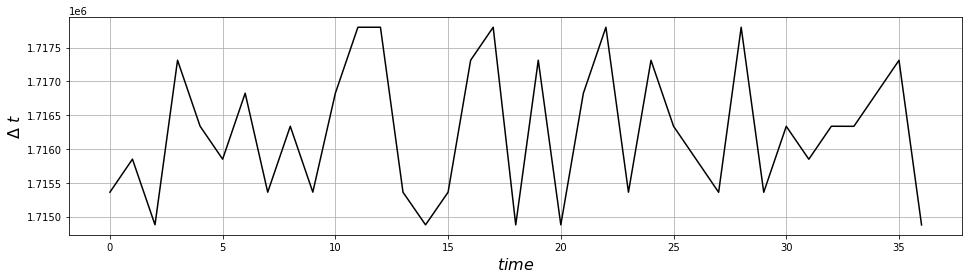

In [6]:
# visual delta_t along with the timeline
plt.plot(df["delta_t"], color="black")

plt.xlabel("$time$", fontsize=16)
plt.ylabel("$\Delta\ t$", fontsize=16)
plt.grid()

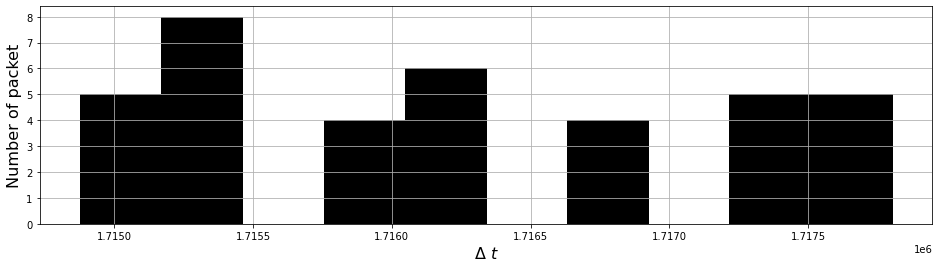

In [7]:
# visual delta_t distribution with histogram
plt.hist(df["delta_t"], color="black", edgecolor="black", bins=10)

plt.xlabel("$\Delta\ t$", fontsize=16)
plt.ylabel("Number of packet", fontsize=16)
plt.grid()

In [8]:
# Worst-case delay
wc_t = max(df["delta_t"])

# Delay std
std_t = df.delta_t.std()

print(f"worse-case delta_t t$: {wc_t} \ndelta_t variation: {std_t} ")

worse-case delta_t t$: 1717802 
delta_t variation: 992.242973579868 


# Reliability

## Definition

**Evaluation metric**
<br>*Quality of data transfer.*
<br> *File correctness*: the ratio of file correctly delivered to the data sink.
***
**Interesting to look at**:
1. *Expected number of transmission*: the ratio of the number of packets correctly received by the data sink and the number of packets sent by the source.

$$ETX = \frac{Number\ of\ packet\ received}{Number\ of\ packet\ sent}$$

2. *Packet reliability*: the number of packet bit correctly delivered to next hop.
$$Bit\ reliability[i] = 1 - BER[i] = 1 - \frac{Number\ of\ wrong\ bit}{Total\ Number\ of\ bit\ sent}$$

## Statistics

In [9]:
def parse_payload(payload_string):
    tmp = map(lambda x: int(x, base=16), payload_string.split())
    return list(tmp)


def compute_sequence(seed, length):
    A1 = 1664525
    C1 = 1013904223
    RAND_MAX1 = (1 << 31) - 1  #
    MAX_BYTE = (1 << 8) - 1  # one byte
    num = seed | (1 << 4)  # seed (4 bites) is part of the seq number
    seq = list()
    for _ in range(length):  # generate the random payload byte by byte
        num = (num * A1 + C1) & RAND_MAX1
        seq.append(num & MAX_BYTE)
    return seq


def popcount(n):
    return bin(n).count("1")


def compute_bit_errors(payload, sequence):
    return sum(
        map(
            popcount,
            (
                np.array(payload[:PACKET_LEN])
                ^ np.array(sequence[: len(payload[:PACKET_LEN])])
            ),
        )
    )


def compute_ber(df, PACKET_LEN):
    packets = len(df)
    bit_counts = PACKET_LEN * packets * 8
    bit_errors = 0

    for idx in range(packets):
        payload = parse_payload(df.payload[idx])
        sequence = compute_sequence(df.seq[idx], PACKET_LEN)
        bit_errors += compute_bit_errors(payload, sequence)

    return bit_errors / bit_counts

Cover the case when there is the retransmission and packet lost

In [10]:
# payload example for debug purpose
# correct sequence for seq NO. 'ae'
PACKET_LEN = 32  # packet payload length defined by the transmitter
tmp = compute_sequence(int("02", base=16), PACKET_LEN)
for i in tmp:
    print("{:02x}".format(i), end=" ")

49 14 63 66 8d 88 47 fa 11 3c 6b ce d5 30 cf e2 d9 64 73 36 1d d8 57 ca a1 8c 7b 9e 65 80 df b2 

In [11]:
PACKET_LEN = 32  # packet payload length defined by the transmitter

# compute the BER for all received packets
ber = compute_ber(df, PACKET_LEN=PACKET_LEN)
print(f"Bit reliability: {1-ber}")

Bit reliability: 1.0


# Energy consumption

## Definition

**The total number of energy for the file transmitted and receiving during the file transmission.**
<br> system energy consumption = Transmission energy consumption + Relay energy consumption
1. Transmission energy consumption: measure transmitter with power profiler kit (PPK2)
2. Relay energy consumption: measure relay node with PPK2
***
<a href="https://infocenter.nordicsemi.com/index.jsp?topic=%2Fug_nrf52840_dk%2FUG%2Fdk%2Fintro.html">Power measurement guidelines</a>

In [12]:
# load ppk data for the transmitter
energy_tx = pd.read_csv("./ppk.csv")

# check the imported data first 10 lines
energy_tx.head(10)

,Timestamp(ms),Current(uA),D0-D7
0,23680.59,13113.505,11111111
1,23680.60,13207.325,11111111
2,23680.61,13348.151,11111111
3,23680.62,13301.196,11111111
4,23680.63,13207.325,11111111
5,23680.64,13160.409,11111111
6,23680.65,13301.196,11111111
7,23680.66,13066.614,11111111
8,23680.67,13113.505,11111111
9,23680.68,13301.196,11111111


In [13]:
# the voltage (controlled by the PPK2, in the example log we set it as 4000 mV)
voltage = 4000 / 1e3  # mV to V

# the power consumption
average_current = energy_tx.iloc[:, 1].mean() / 1e6  # mA to A
time = (energy_tx.iloc[-1, 0] - energy_tx.iloc[0, 0]) / 1e3  # ms to S
charge = average_current * time  # unit is C
power = average_current * voltage

print(
    f"The total charge (current*time) [mC]: {charge*1e3} \nThe total energy consumption is [mW]: {power*1e3}"
)

The total charge (current*time) [mC]: 35.554824991916256 
The total energy consumption is [mW]: 53.05799398148258


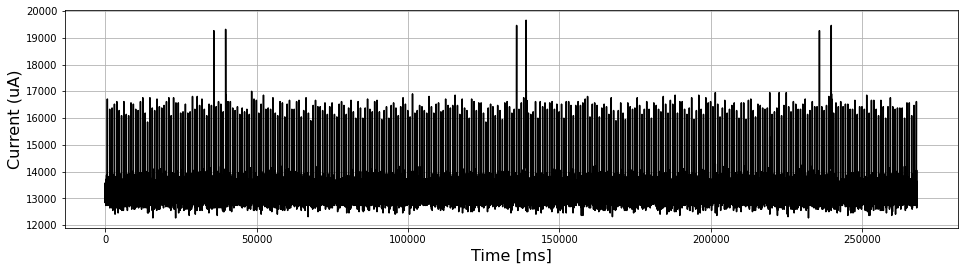

In [14]:
# the current log for three transmissions
plt.plot(energy_tx.iloc[:, 1], color="black")

plt.xlabel("Time [ms]", fontsize=16)
plt.ylabel("Current (uA)", fontsize=16)
plt.grid()